In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import xgboost as xg

In [4]:
data = pd.read_csv('insurance.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Exploratory Data Analysis

### Distribution Graph of BMI

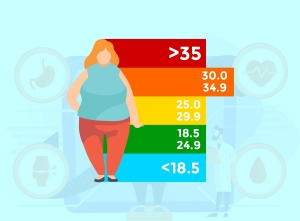

In [8]:
bmi = pd.cut(x=data['bmi'],
             bins=[15, 18, 25, 30, 35, 55]).value_counts().sort_index()

print(bmi)

(15, 18]     15
(18, 25]    232
(25, 30]    386
(30, 35]    389
(35, 55]    316
Name: bmi, dtype: int64


In [9]:
charges_by_bmi = data[['bmi', 'charges']]

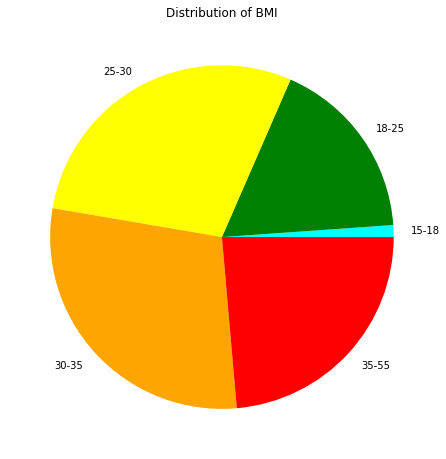

In [10]:
labels = ['15-18','18-25', '25-30', '30-35', '35-55']
plt.figure(figsize=(7.9, 7.9))
plt.pie(bmi, labels = labels, colors=['#00FFFF', 'green', 'yellow', 'orange', 'red'])
plt.title("Distribution of BMI")
plt.show()


As you see pie chart above, BMI values is distributed between 15 and 55  

### Relation Beetween Smoker and Charges

In [11]:
average_smoker = data.groupby(data['smoker'])['charges'].mean()

In [12]:
average_smoker

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

Text(0.5, 1.0, 'Medical Cost by Smoking Habit')

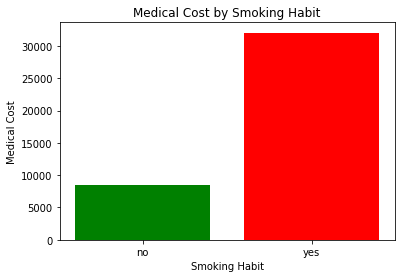

In [13]:
plt.bar(average_smoker.index, average_smoker.values, color=['green', 'red'])
plt.xlabel("Smoking Habit")
plt.ylabel("Medical Cost")
plt.title("Medical Cost by Smoking Habit")

The graph shows us people who smoke face 2.8 times more medical cost.

## Relation Beetween Smoker and Region

Number of records for each smoking region;

In [14]:
result = data.query('smoker == "yes"').groupby("region").count()

print(result.filter(items=['smoker']))

           smoker
region           
northeast      67
northwest      58
southeast      91
southwest      58


Number of records for each no smoking region;

In [15]:
result = data.query('smoker == "no"').groupby("region").count()

print(result.filter(items=['smoker']))

           smoker
region           
northeast     257
northwest     267
southeast     273
southwest     267


## Relation Beetween BMI and Sex

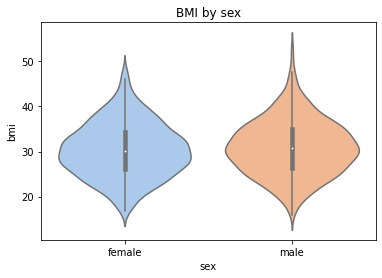

In [16]:
sns.violinplot(x="sex", y="bmi", data=data, palette="pastel")
plt.title("BMI by sex")
plt.show()

Body mass index by sex is given in the graph. It is seen that the body mass index is concentrated above 30 for both the male and famele categories.

## En çok “children”’a sahip “region”

In [17]:
northwest_c = data[data.region == "northwest"].children.count()
northeast_c = data[data.region == "northeast"].children.count()
southwest_c = data[data.region == "southwest"].children.count()
southheast_c = data[data.region == "southeast"].children.count()

print(northwest_c, northeast_c, southwest_c, southheast_c)

#En çok “children”’a sahip “region”: Southeast

325 324 325 364


Text(0.5, 1.0, 'Children by Region')

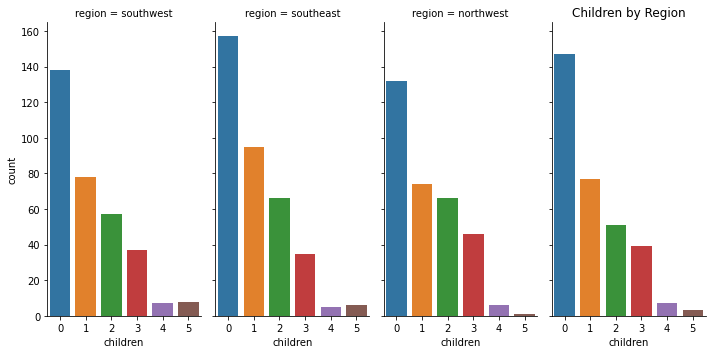

In [18]:
sns.catplot(x = 'children', col = 'region', data = data, kind = 'count', aspect = 0.5)
plt.title('Children by Region')

## “Age” ile “bmi” arasındaki ilişki

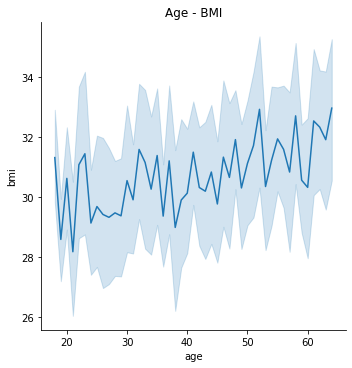

In [19]:
sns.relplot(x = data.age, y = data.bmi, data = data, kind='line') 
plt.title('Age - BMI')
plt.show()

In [20]:
# Yaşlara göre kategoriler:

data.loc[(data['age'] >= 18) & (data['age'] < 36), 'age_category'] = 'youth'
data.loc[(data['age'] >= 36) & (data['age'] <= 55), 'age_category'] = 'adults'
data.loc[data['age'] > 55, 'age_category'] = 'seniors'
data['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

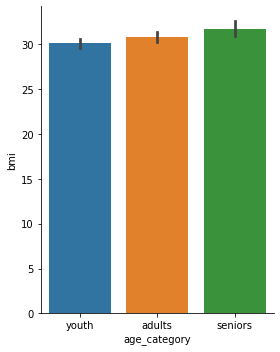

In [21]:
sns.catplot(x = 'age_category', y = 'bmi', data = data, kind = 'bar', aspect = 0.8)

In [22]:
data.loc[data['bmi'] < 18.5, 'weight_condition'] = 'underweight'
data.loc[(data['bmi'] >= 18.5) & (data['bmi'] <= 24.9), 'weight_condition'] = 'normal'
data.loc[(data['bmi'] > 24.9) & (data['bmi'] <= 29.9), 'weight_condition'] = 'overweight'
data.loc[data['bmi'] > 29.9, 'weight_condition'] = 'obese'

data['weight_condition'].value_counts()

obese          716
overweight     380
normal         222
underweight     20
Name: weight_condition, dtype: int64

In [ ]:
#Gençlerin kilo durumu
youth_underweight = data[data.age_category == "youth"][data.weight_condition == "underweight"].weight_condition.count()
youth_normal = data[data.age_category == "youth"][data.weight_condition == "normal"].weight_condition.count()
youth_overweight = data[data.age_category == "youth"][data.weight_condition == "overweight"].weight_condition.count()
youth_obese = data[data.age_category == "youth"][data.weight_condition == "obese"].weight_condition.count()

#Yetişkinlerin kilo durumu
adults_underweight = data[data.age_category == "adults"][data.weight_condition == "underweight"].weight_condition.count()
adults_normal = data[data.age_category == "adults"][data.weight_condition == "normal"].weight_condition.count()
adults_overweight = data[data.age_category == "adults"][data.weight_condition == "overweight"].weight_condition.count()
adults_obese = data[data.age_category == "adults"][data.weight_condition == "obese"].weight_condition.count()

#Yaşlıların kilo durumu
seniors_underweight = data[data.age_category == "seniors"][data.weight_condition == "underweight"].weight_condition.count()
seniors_normal = data[data.age_category == "seniors"][data.weight_condition == "normal"].weight_condition.count()
seniors_overweight = data[data.age_category == "seniors"][data.weight_condition == "overweight"].weight_condition.count()
seniors_obese = data[data.age_category == "seniors"][data.weight_condition == "obese"].weight_condition.count()


#print(youth_underweight, youth_normal, youth_overweight, youth_obese)
#print(adults_underweight, adults_normal, adults_overweight, adults_obese)
#print(seniors_underweight, seniors_normal, seniors_overweight,seniors_obese)

age_weight=pd.DataFrame([[youth_underweight, youth_normal, youth_overweight, youth_obese], 
                         [adults_underweight, adults_normal, adults_overweight, adults_obese],
                         [seniors_underweight, seniors_normal, seniors_overweight, seniors_obese]], columns=['underwight', 'normal', 'overweight', 'obese'], index = ['youth', 'adults', 'seniors'])

In [24]:
age_weight

,underwight,normal,overweight,obese
youth,13,112,161,288
adults,5,85,162,296
seniors,2,25,57,132


Kilolu olanların çoğunluğu genç ve yetişkinler yani 55 yaşından küçük olanlar oluşturuyor diyebiliriz. Zayıf ve normal kiloda olanların çoğunu ise 36 yaşından küçükler oluşturmaktadır. Obez yaşlı sayısı diğerlerine göre daha azdır yorumlarını yapabiliriz.

## “bmi” ile “children” arasındaki ilişki

In [25]:
data.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Text(0.5, 1.0, 'Children - BMI')

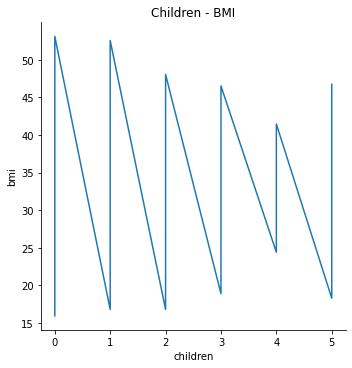

In [26]:
sns.relplot(x="children", y="bmi", kind="line", estimator=None, data=data)
plt.title('Children - BMI')

Text(0.5, 1.0, 'Correlation Between BMI and Children')

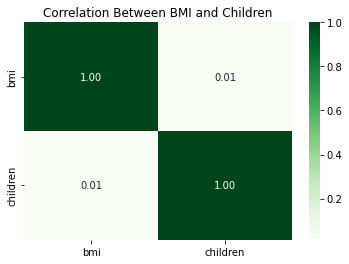

In [27]:
correlation = data[['bmi', 'children']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Greens')
plt.title('Correlation Between BMI and Children')

SONUC yazamadım.

## “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [28]:
bmi_i=data.bmi
outliers=[]
def detect_outlier(bmi_i):
    
    threshold=3
    mean_1 = np.mean(bmi_i)
    std_1 =np.std(bmi_i)
    
    
    for y in bmi_i:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [29]:
outlier_datapoints = detect_outlier(bmi_i)
print(outlier_datapoints)

[49.06, 50.38, 52.58, 53.13]


In [30]:
print(np.where(data['bmi']>49))

(array([ 116,  847, 1047, 1317]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


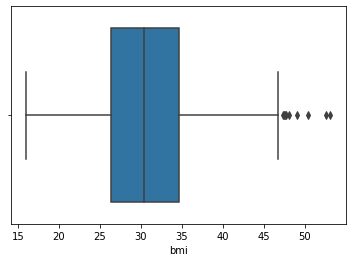

In [31]:
sns.boxplot(data['bmi'])

"BMI" değişkeni incelendiğinde yukarıdaki grafiğe gör;, 49'un üzerindeki değerlerin aykırı değerler olarak hareket ettiğini açıkça görebiliriz. 49 üzeri outlier (aykırı değerleri) var. Aykırı Değer Endeksi: 116, 847, 1047 ve 1317 indexteki outlier'dir.

In [32]:
data.drop(['age_category', "weight_condition"], axis =1, inplace = True)

## Relation Between BMI and Charges

In [33]:
mean_charges_by_bmi = data.groupby(pd.cut(data['bmi'],
             bins = [15, 18, 25, 30, 35, 55]))['charges'].mean()
print(mean_charges_by_bmi)

bmi
(15, 18]     7576.420217
(18, 25]    10459.367815
(25, 30]    10997.803881
(30, 35]    14429.421062
(35, 55]    16953.823618
Name: charges, dtype: float64


Text(0.5, 1.0, 'Medical Cost by BMI')

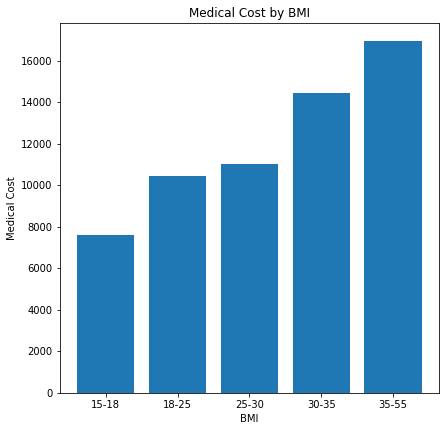

In [34]:
plt.figure(figsize=(6.8, 6.8))
plt.bar(labels, mean_charges_by_bmi.values)
plt.xlabel("BMI")
plt.ylabel("Medical Cost")
plt.title("Medical Cost by BMI")

The chart shows us the there is a positive correlation between BMI and average medical cost.

## Relation Between Region, Smoker and BMI

In [35]:
region_smoker_count = data.loc[data.smoker == 'yes']
region_smoker_count = region_smoker_count.groupby(region_smoker_count['region'])['bmi'].mean()

region_non_smoker_count = data.loc[data.smoker == 'no']
region_non_smoker_count = region_non_smoker_count.groupby(region_non_smoker_count['region'])['bmi'].mean()

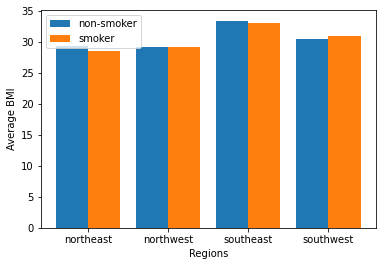

In [36]:
x_axis = np.arange(len(region_smoker_count.index))


plt.bar(x_axis -0.2, region_non_smoker_count.values, width=0.4, label = 'non-smoker')
plt.bar(x_axis +0.2, region_smoker_count.values, width=0.4, label = 'smoker')

plt.xticks(x_axis, region_smoker_count.index)

plt.xlabel("Regions")
plt.ylabel("Average BMI")

plt.legend()

plt.show()

The graph shows us region has no correlation with BMI and smoking habit. But people in southeast have more BMI exceptionally.

# Data Preprocessing

In [37]:
encoder = LabelEncoder()

In [38]:
X = data

In [39]:
X.drop(X[X.bmi > 49].index, axis=0, inplace = True)
X.reset_index(inplace = True)

In [40]:
X['sex'] = encoder.fit_transform(X['sex'])
X['smoker'] = encoder.fit_transform(X['smoker'])
X['region'] = encoder.fit_transform(X['region'])

In [41]:
corr = X.corr()

In [42]:
corr

,index,age,sex,bmi,children,smoker,region,charges
index,1.000000,-0.026974,0.002459,-0.042159,0.025550,0.004059,-0.001894,-0.003886
age,-0.026974,1.000000,-0.019041,0.118887,0.042345,-0.023820,0.002974,0.301360
sex,0.002459,-0.019041,1.000000,0.037031,0.018667,0.076096,0.003293,0.057165
bmi,-0.042159,0.118887,0.037031,1.000000,0.018054,0.002264,0.155877,0.200799
children,0.025550,0.042345,0.018667,0.018054,1.000000,0.007087,0.017234,0.067569
smoker,0.004059,-0.023820,0.076096,0.002264,0.007087,1.000000,-0.002333,0.786536
region,-0.001894,0.002974,0.003293,0.155877,0.017234,-0.002333,1.000000,-0.006404
charges,-0.003886,0.301360,0.057165,0.200799,0.067569,0.786536,-0.006404,1.000000


In [43]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1334.0,668.010495,386.096360,0.0000,334.250000,667.5000,1001.750000,1337.00000
age,1334.0,39.233883,14.034654,18.0000,27.000000,39.0000,51.000000,64.00000
sex,1334.0,0.503748,0.500173,0.0000,0.000000,1.0000,1.000000,1.00000
bmi,1334.0,30.601555,6.000927,15.9600,26.237500,30.3325,34.595000,48.07000
children,1334.0,1.096702,1.206548,0.0000,0.000000,1.0000,2.000000,5.00000
smoker,1334.0,0.204648,0.403595,0.0000,0.000000,0.0000,0.000000,1.00000
region,1334.0,1.514243,1.106222,0.0000,1.000000,2.0000,2.000000,3.00000
charges,1334.0,13265.622751,12089.666548,1121.8739,4746.521225,9382.0330,16639.912515,63770.42801


In [44]:
X = X.drop_duplicates()

In [45]:
y = X.loc[:, 'charges']
X = X.drop(['charges'], axis=1)

In [46]:
X

,index,age,sex,bmi,children,smoker,region
0,0,19,0,27.900,0,1,3
1,1,18,1,33.770,1,0,2
2,2,28,1,33.000,3,0,2
3,3,33,1,22.705,0,0,1
4,4,32,1,28.880,0,0,1
...,...,...,...,...,...,...,...
1329,1333,50,1,30.970,3,0,1
1330,1334,18,0,31.920,0,0,0
1331,1335,18,0,36.850,0,0,2
1332,1336,21,0,25.800,0,0,3


In [47]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1329    10600.54830
1330     2205.98080
1331     1629.83350
1332     2007.94500
1333    29141.36030
Name: charges, Length: 1334, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Model Selection

### Linear Regression

In [49]:
linear_reg = LinearRegression()
linear_reg = linear_reg.fit(X_train, y_train)
linear_pred = linear_reg.predict(X_test)

In [50]:
score = cross_val_score(linear_reg, X_train, y_train, cv=5, scoring="r2")

In [51]:
print('Logistic Regressor score:', score.mean())

Logistic Regressor score: 0.7413669856645775


### SVM Regressor

In [ ]:
svm_regressor = SVR(kernel = 'rbf')
svm_regressor.fit(X_train, y_train)

In [53]:
score = cross_val_score(svm_regressor, X_train, y_train, cv=5, scoring="r2")

In [54]:
print('SVM Regressor score:', score.mean())

SVM Regressor score: -0.10773730933451042


### Ridge Regression

In [ ]:
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

In [56]:
score = cross_val_score(ridge_regressor, X_train, y_train, cv=5, scoring="r2")

In [57]:
print('Ridge Regressor score:', score.mean())

Ridge Regressor score: 0.7413638643430396


### KNN Regressor 

In [ ]:
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)

In [59]:
score = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring="r2")

In [60]:
print('KNN Regressor score:', score.mean())

KNN Regressor score: -0.06886551672901511


## MLP Regressor

In [ ]:
mlp_reg = MLPRegressor()
mlp_reg.fit(X_train, y_train)

In [ ]:
score = cross_val_score(mlp_reg, X_train, y_train, cv=5, scoring="r2")

In [63]:
print('MLP Regressor score:', score.mean())

MLP Regressor score: -0.1908839680947892


## Random Forest Regressor

In [ ]:
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(X_train, y_train)

In [65]:
score = cross_val_score(random_forest_reg, X_train, y_train, cv=5, scoring="r2")

In [66]:
print('Random Forest Regressor score:', score.mean())

Random Forest Regressor score: 0.8398148357538215


## XGBoost Regresssor

In [ ]:
xgb_regressor = xg.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

In [ ]:
score = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring="r2")

In [69]:
print('XGBoost Regresssor score:', score.mean())

XGBoost Regresssor score: 0.8531477400335922


# Hyper Parameter Optimization

We choose XGBoost as a best performing model. We ll fix hyper parameters to more optimize the model.

In [70]:
model = xg.XGBRegressor()

In [71]:
hyperparameter_grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth': [3, 5, 10, 15],
    'learning_rate': [0.05, 0.1, 0.15, 0.20],
    'min_child_weight': [1, 2, 3, 4]
    }

In [72]:
xgb_grid = GridSearchCV(model,
                        hyperparameter_grid,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train, y_train)

In [74]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8532379792388136
{'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 100}


In [75]:
hyperparameter_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.05],
    'min_child_weight': [4, 6]
    }

In [76]:
xgb_grid = GridSearchCV(model,
                        hyperparameter_grid,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train, y_train)

In [78]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8549946275395255
{'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 100}


In [79]:
hyperparameter_grid = {
    'n_estimators': [75, 100, 150],
    'max_depth': [3],
    'learning_rate': [0.01, 0.05],
    'min_child_weight': [4, 5, 6, 8, 10]
    }

In [80]:
xgb_grid = GridSearchCV(model,
                        hyperparameter_grid,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train, y_train)

In [82]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.855774858274841
{'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 150}


In [83]:
hyperparameter_grid = {
    'n_estimators': [150, 300, 500, 1000, 2000, 4000],
    'max_depth': [3],
    'learning_rate': [0.02, 0.05],
    'min_child_weight': [7, 8]
    }

In [84]:
xgb_grid = GridSearchCV(model,
                        hyperparameter_grid,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train, y_train)

In [86]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.855774858274841
{'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 8, 'n_estimators': 150}


Comparison of default and optimized hyper paramaters versions

In [ ]:
print('default\'s score:', score.mean())
print('optimized hyperparameters\'s score:', xgb_grid.best_score_)

# Model evaluation

In [ ]:
model = xg.XGBRegressor(**xgb_grid.best_params_)
model.fit(X_train, y_train)

In [89]:
model_preds = model.predict(X_test)

In [90]:
print('#----- XGBoost Regresssion -----#')
mse = mean_squared_error(y_test, model_preds)
print('Mean Squared Error:', mse)

mae = mean_absolute_error(y_test, model_preds)
print('Mean Absolute Error:', mae)

mape = mean_absolute_percentage_error(y_test, model_preds)
print('Mean Absolute Percentage Error:', mape)

#----- XGBoost Regresssion -----#
Mean Squared Error: 19913650.3464449
Mean Absolute Error: 2461.980495729388
Mean Absolute Percentage Error: 0.2814575738265074
